In [3]:
import pandas as pd_maria
import numpy as np_maria
import statsmodels.api as sm_maria
import matplotlib.pyplot as plt_maria
from sklearn import linear_model
%matplotlib inline
import seaborn as sns

In [4]:
df_maria = pd_maria.read_csv('DATASET.csv')
df_maria

,Rented SqFt,Percent Office Space,Year Build,Clear Height,Truck-High Doors,Ground Level Doors,Date of Lease,Monthly Rent
0,515,5.576001,1981,20.5,0,2,10/7/1981,8500
1,500,5.576001,1982,20.0,0,2,22/6/1982,8000
2,700,7.248801,1983,21.5,0,1,25/1/1983,10000
3,380,4.237761,1984,25.0,0,3,10/7/1984,7666
4,990,9.480081,1985,25.1,0,1,19/8/1985,11000
5,567,5.670091,1986,25.5,0,3,19/4/1986,8700
6,345,3.980031,1987,20.0,0,2,15/6/1987,7000
7,998,9.977751,1988,25.5,0,1,12/2/1988,12000
8,650,6.699111,1989,23.5,0,3,11/1/1989,9200
9,700,7.890001,1890,24.5,0,1,12/4/1990,9800


In [5]:
correlation_matrix = df_maria.corr().round(2)

In [6]:
plt_maria.figure(figsize=(4, 6))

<Figure size 288x432 with 0 Axes>

<Figure size 288x432 with 0 Axes>

<AxesSubplot:>

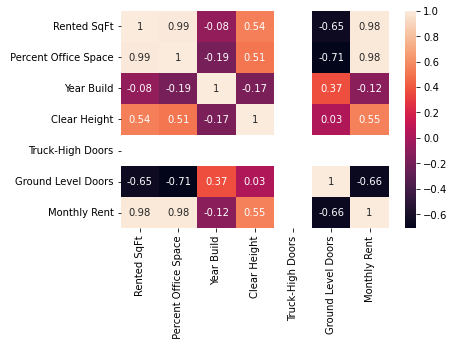

In [7]:
sns.heatmap(data=correlation_matrix, annot=True)

In [8]:
df_maria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented SqFt            10 non-null     int64  
 1    Percent Office Space  10 non-null     float64
 2   Year Build             10 non-null     int64  
 3   Clear Height           10 non-null     float64
 4   Truck-High Doors       10 non-null     int64  
 5   Ground Level Doors     10 non-null     int64  
 6   Date of Lease          10 non-null     object 
 7   Monthly Rent           10 non-null     int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 768.0+ bytes


In [22]:
df_maria.describe()

,Rented SqFt,Percent Office Space,Year Build,Clear Height,Truck-High Doors,Ground Level Doors,Monthly Rent
count,10.000000,10.000000,10.000000,10.000000,10.0,10.000000,10.000000
mean,634.500000,6.633563,1975.500000,23.110000,0.0,1.900000,9186.600000
std,224.311415,2.032895,30.152391,2.352044,0.0,0.875595,1543.853778
min,345.000000,3.980031,1890.000000,20.000000,0.0,1.000000,7000.000000
25%,503.750000,5.576001,1982.250000,20.750000,0.0,1.000000,8125.000000
50%,608.500000,6.184601,1984.500000,24.000000,0.0,2.000000,8950.000000
75%,700.000000,7.729701,1986.750000,25.075000,0.0,2.750000,9950.000000
max,998.000000,9.977751,1989.000000,25.500000,0.0,3.000000,12000.000000


In [10]:
reg = linear_model.LinearRegression()

In [20]:
X=df_maria['Rented SqFt'].values.reshape(-1,1)
X


array([[515],
       [500],
       [700],
       [380],
       [990],
       [567],
       [345],
       [998],
       [650],
       [700]], dtype=int64)

In [23]:
Y=df_maria['Monthly Rent'].values.reshape(-1,1)
Y

array([[ 8500],
       [ 8000],
       [10000],
       [ 7666],
       [11000],
       [ 8700],
       [ 7000],
       [12000],
       [ 9200],
       [ 9800]], dtype=int64)

In [17]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()


In [24]:
reg.fit(X,Y)

LinearRegression()

In [25]:
Intercept=reg.intercept_
Coefficients=reg.coef_

print(Intercept)

print(Coefficients)

[4905.36487748]
[[6.74741548]]


In [26]:
import statsmodels.api as ssm 


#for detail description of linear coefficients, intercepts, deviations,
# and many more

In [27]:
X=ssm.add_constant(X)           #to add constant value in the model
model= ssm.OLS(Y,X).fit()         #fitting the model
predictions= model.summary()      #summary of the model
predictions

C:\Users\AHS\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     197.6
Date:                Sun, 09 Jan 2022   Prob (F-statistic):           6.37e-07
Time:                        10:54:15   Log-Likelihood:                -70.850
No. Observations:                  10   AIC:                             145.7
Df Residuals:                       8   BIC:                             146.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4905.3649    321.220     15.271      0.000    4164.630    5646.100
x1             6.7474      0.480     14.058      0.000       5.641       7.854
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   2.634
Prob(Omnibus):                  0.662   Jarque-Bera (JB):                0.601
Skew:                          -0.511   Prob(JB):                        0.740
Kurtosis:                       2.369   Cond. No.                     2.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
Done!